In [17]:
%matplotlib inline

# General libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplleaflet
plt.style.use('fivethirtyeight')

# To ensure integer division works in 2.7
from __future__ import division

In [2]:
df = pd.read_csv('train.csv', parse_dates=[0])
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [3]:
df = df.drop(['Descript', 'Resolution'], axis=1)
df = df[df.X < -121]
df = df[df.Y< 80]

In [4]:
print df.shape
df.dtypes

(877982, 7)


Dates         datetime64[ns]
Category              object
DayOfWeek             object
PdDistrict            object
Address               object
X                    float64
Y                    float64
dtype: object

In [5]:
# validate data
print "Date range: ",df.Dates.min(),df.Dates.max()
print "Number of Categories: ", len(df.Category.unique())
print "\nCategory: "
print df.Category.value_counts()

# Issue: Top categories 100-1000x more prevalent than bottom categories

Date range:  2003-01-06 00:01:00 2015-05-13 23:53:00
Number of Categories:  39

Category: 
LARCENY/THEFT                  174885
OTHER OFFENSES                 126165
NON-CRIMINAL                    92300
ASSAULT                         76872
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53772
VANDALISM                       44724
WARRANTS                        42206
BURGLARY                        36754
SUSPICIOUS OCC                  31412
MISSING PERSON                  25989
ROBBERY                         22999
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7325
STOLEN PROPERTY                  4539
SEX OFFENSES FORCIBLE            4387
DISORDERLY CONDUCT               4318
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       23

In [6]:
# check values for categorical fields
print("Day of Week: ")
print(df.DayOfWeek.value_counts())
print("\nDistrict: ")
print(df.PdDistrict.value_counts())
print("\nAddress: ")
print(df.Address.value_counts())


Day of Week: 
Friday       133723
Wednesday    129200
Saturday     126804
Thursday     125027
Tuesday      124954
Monday       121573
Sunday       116701
Name: DayOfWeek, dtype: int64

District: 
SOUTHERN      157174
MISSION       119907
NORTHERN      105284
BAYVIEW        89422
CENTRAL        85455
TENDERLOIN     81794
INGLESIDE      78841
TARAVAL        65592
PARK           49311
RICHMOND       45202
Name: PdDistrict, dtype: int64

Address: 
800 Block of BRYANT ST                   26533
800 Block of MARKET ST                    6581
2000 Block of MISSION ST                  5097
1000 Block of POTRERO AV                  4063
900 Block of MARKET ST                    3251
0 Block of TURK ST                        3228
0 Block of 6TH ST                         2884
300 Block of ELLIS ST                     2703
400 Block of ELLIS ST                     2590
16TH ST / MISSION ST                      2504
1000 Block of MARKET ST                   2489
1100 Block of MARKET ST            

In [6]:
# check X,Y values
print df.X.describe()
print '\n', df.Y.describe()


count    877982.000000
mean       -122.422763
std           0.025285
min        -122.513642
25%        -122.432952
50%        -122.416420
75%        -122.406959
max        -122.364937
Name: X, dtype: float64

count    877982.000000
mean         37.767035
std           0.024165
min          37.707879
25%          37.752427
50%          37.775421
75%          37.784368
max          37.819975
Name: Y, dtype: float64


## Analysis of Crime by Minute Reported


In [7]:
df['MIN'] = df.Dates.dt.minute

In [8]:
df['MIN_split'] = ((df.MIN == 0) | (df.MIN == 30))


In [9]:
qwe = df.groupby(['Category']).count()

In [19]:
qwe = df[df.Category == 'LARCENY/THEFT']

print qwe.MIN_split.sum() / qwe.MIN_split.count()

0.6436401063556051


In [20]:
df.Category.unique()

array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS',
       'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY',
       'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD',
       'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
       'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT',
       'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY',
       'EMBEZZLEMENT', 'SUICIDE', 'LOITERING',
       'SEX OFFENSES NON FORCIBLE', 'EXTORTION', 'GAMBLING', 'BAD CHECKS',
       'TREA', 'RECOVERED VEHICLE', 'PORNOGRAPHY/OBSCENE MAT'],
      dtype=object)

In [21]:
qwe.head()
minsplit = []
for cat in df.Category.unique():
    qwe = df[df.Category == cat]
    minsplit +=[[(qwe.MIN_split.sum() / qwe.MIN_split.count()), cat]]

In [22]:
minsplit = pd.DataFrame(minsplit)
minsplit.columns = ['Ratio', 'Category']
minsplit.index = minsplit.Category
minsplit = minsplit.sort_index(ascending = False)
print (minsplit)

                                Ratio                     Category
Category                                                          
WEAPON LAWS                  0.190064                  WEAPON LAWS
WARRANTS                     0.141117                     WARRANTS
VEHICLE THEFT                0.792680                VEHICLE THEFT
VANDALISM                    0.592031                    VANDALISM
TRESPASS                     0.262662                     TRESPASS
TREA                         0.000000                         TREA
SUSPICIOUS OCC               0.403699               SUSPICIOUS OCC
SUICIDE                      0.340551                      SUICIDE
STOLEN PROPERTY              0.246089              STOLEN PROPERTY
SEX OFFENSES NON FORCIBLE    0.628378    SEX OFFENSES NON FORCIBLE
SEX OFFENSES FORCIBLE        0.571461        SEX OFFENSES FORCIBLE
SECONDARY CODES              0.425038              SECONDARY CODES
RUNAWAY                      0.599692                      RUN

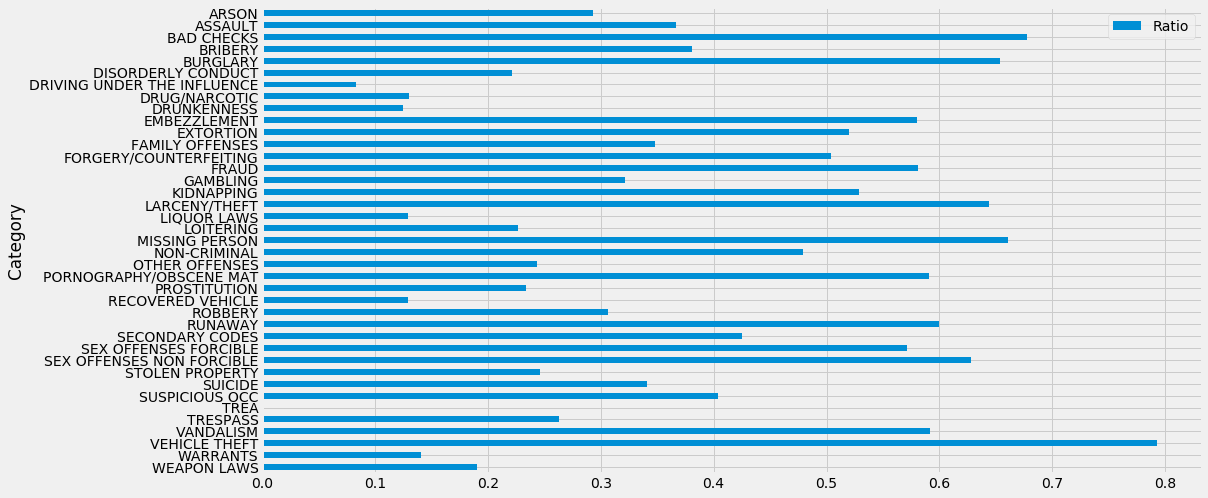

In [23]:
minsplit.plot.barh(figsize=(15,8))


## Analysis of Crime by District

In [24]:
# Group by District and Category

grouped_dist = pd.DataFrame(df.groupby(['PdDistrict','Category']).count())
grouped_dist.reset_index(inplace=True)
#grouped_dist.rename(columns = {'ID':'Incidence_Count'},inplace=True)
grouped_dist_wide = grouped_dist.pivot(index='PdDistrict', columns='Category', values = 'Dates')
grouped_dist_wide

Category,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
PdDistrict,,,,,,,,,,,,,,,,,,,,,
BAYVIEW,393.0,9855.0,34.0,56.0,3929.0,219.0,179.0,4498.0,243.0,100.0,...,22.0,397.0,37.0,3905.0,3.0,636.0,5355.0,7219.0,4322.0,1647.0
CENTRAL,111.0,6977.0,65.0,12.0,4519.0,494.0,160.0,1805.0,517.0,180.0,...,7.0,510.0,60.0,2841.0,1.0,904.0,4469.0,4210.0,2777.0,487.0
INGLESIDE,182.0,8532.0,32.0,53.0,3331.0,171.0,206.0,2373.0,190.0,78.0,...,22.0,347.0,65.0,3167.0,NaN,416.0,5374.0,8960.0,2528.0,1130.0
MISSION,145.0,11149.0,46.0,66.0,3745.0,1099.0,357.0,8757.0,782.0,124.0,...,35.0,631.0,72.0,3808.0,1.0,1021.0,5294.0,7148.0,6615.0,1329.0
NORTHERN,149.0,8318.0,54.0,18.0,5854.0,450.0,260.0,4511.0,368.0,131.0,...,9.0,699.0,67.0,3270.0,1.0,780.0,5404.0,6291.0,4595.0,789.0
PARK,65.0,3515.0,15.0,7.0,2888.0,271.0,176.0,2573.0,374.0,50.0,...,6.0,175.0,20.0,1656.0,NaN,290.0,2613.0,3961.0,2318.0,357.0
RICHMOND,103.0,3202.0,31.0,8.0,2696.0,108.0,319.0,999.0,149.0,43.0,...,10.0,206.0,42.0,2191.0,NaN,245.0,3180.0,4113.0,1010.0,327.0
SOUTHERN,185.0,12183.0,74.0,37.0,4841.0,511.0,306.0,9228.0,959.0,275.0,...,17.0,1007.0,59.0,5065.0,NaN,1456.0,6550.0,4724.0,9101.0,1128.0
TARAVAL,120.0,5463.0,36.0,17.0,3463.0,162.0,202.0,1531.0,259.0,94.0,...,15.0,231.0,59.0,2996.0,NaN,386.0,4869.0,6142.0,1616.0,567.0


Text(0,0.5,'Number of Crimes')

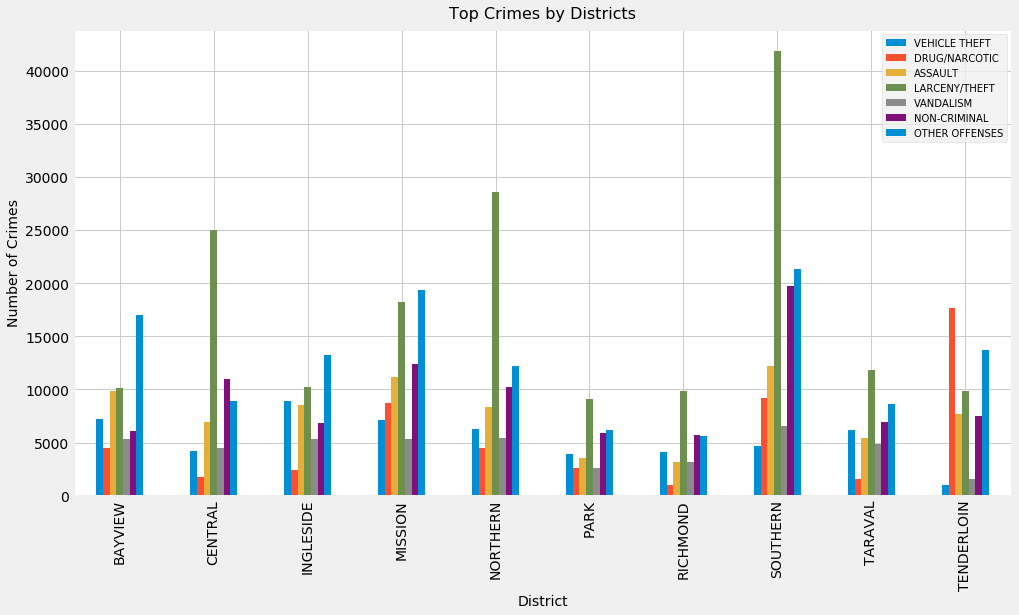

In [25]:
# crimes by district for top categories
top_5 = df.Category.value_counts().head(7)
top_5_ls = list(dict(top_5).keys())
fig, ax = plt.subplots(figsize=(15, 8))
ax = grouped_dist_wide[top_5_ls].plot(ax=ax, kind='bar')
ax.set_facecolor('white')
# Add some more Labeling
ax.legend(loc="upper right", fontsize=10)
plt.title("Top Crimes by Districts",  y=1.01, size=16)
plt.xlabel("District",size=14)
plt.ylabel("Number of Crimes", size=14)

Text(0,0.5,'Number of Crimes')

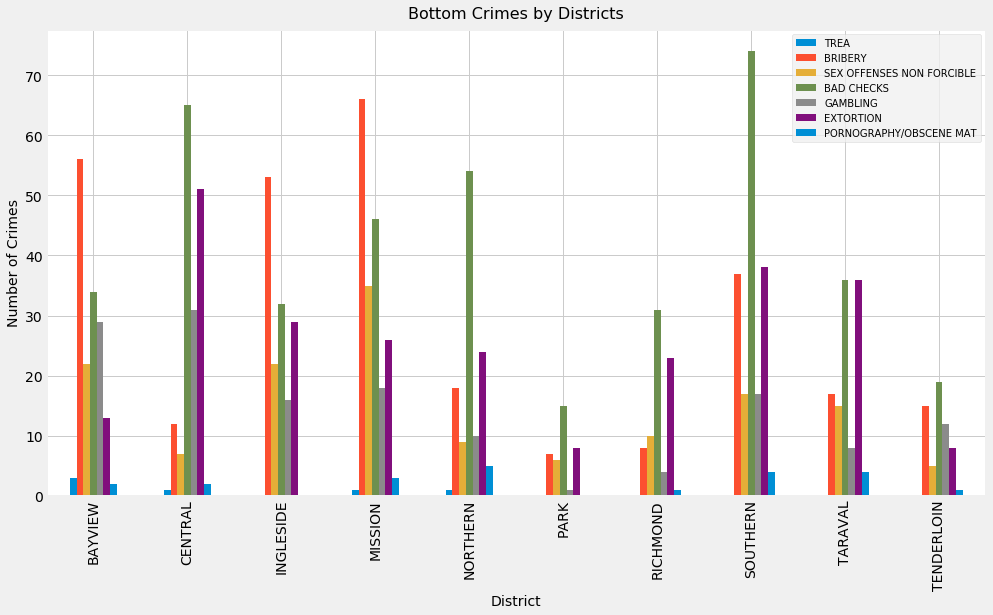

In [26]:
# crimes by district for bottom categories
top_5 = df.Category.value_counts().tail(7)
top_5_ls = list(dict(top_5).keys())
fig, ax = plt.subplots(figsize=(15, 8))
ax = grouped_dist_wide[top_5_ls].plot(ax=ax, kind='bar')
ax.set_facecolor('white')
# Add some more Labeling
ax.legend(loc="upper right", fontsize=10)
plt.title("Bottom Crimes by Districts",  y=1.01, size=16)
plt.xlabel("District",size=14)
plt.ylabel("Number of Crimes", size=14)

## Visualization of Seasonality

In [27]:
# Add Hours, Days, Months, Years 
df['DOW'] = df.Dates.dt.weekday
df['DOM'] = df.Dates.dt.day
df['HOUR'] = df.Dates.dt.hour
df['MONTH'] = df.Dates.dt.month
df['YEAR'] = df.Dates.dt.year

In [28]:
df.head()

,Dates,Category,DayOfWeek,PdDistrict,Address,X,Y,MIN,MIN_split,DOW,DOM,HOUR,MONTH,YEAR
0,2015-05-13 23:53:00,WARRANTS,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,53,False,2,13,23,5,2015
1,2015-05-13 23:53:00,OTHER OFFENSES,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,53,False,2,13,23,5,2015
2,2015-05-13 23:33:00,OTHER OFFENSES,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,33,False,2,13,23,5,2015
3,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,30,True,2,13,23,5,2015
4,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,30,True,2,13,23,5,2015


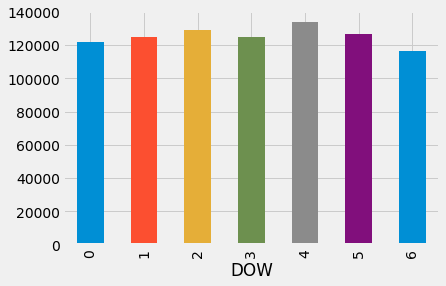

In [29]:
df.groupby(df.DOW).Dates.count().plot.bar()

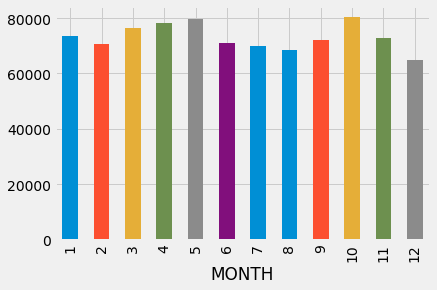

In [30]:
df.groupby(df.MONTH).Dates.count().plot.bar()

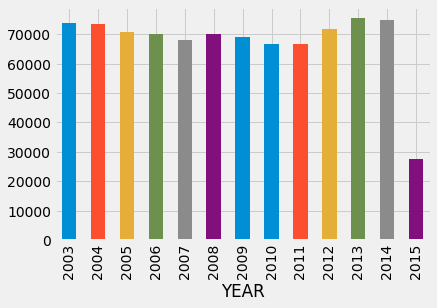

In [31]:
df.groupby(df.YEAR).Dates.count().plot.bar()

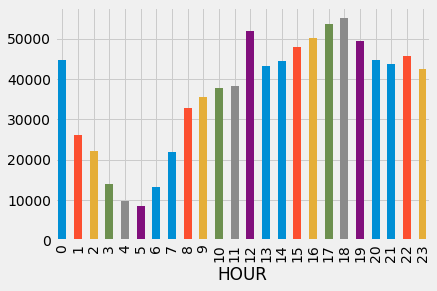

In [32]:
df.groupby(df.HOUR).Dates.count().plot.bar()

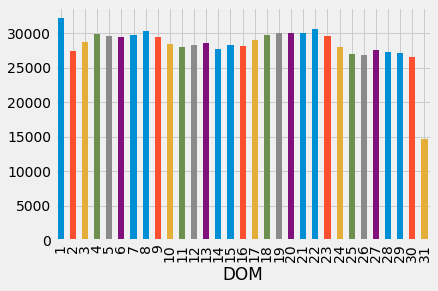

In [33]:
df.groupby(df.DOM).Dates.count().plot.bar()

## Location Analysis


In [34]:
test1 = df[(df.PdDistrict == 'SOUTHERN') & (df.Category == 'ARSON')]
fig = plt.figure(figsize=(15,10))
plt.scatter(test1.X , test1.Y)
mplleaflet.display(fig)


In [35]:
test2 = df[(df.PdDistrict == 'RICHMOND') & (df.Category == 'VEHICLE THEFT') & (df.YEAR == 2004)]
fig = plt.figure(figsize=(15,10))
plt.scatter(test2.X , test2.Y)
mplleaflet.display(fig)

In [36]:
# Crimes with particular address
test3 = df[(df.Address.str.contains('MARKET')) & (df.Category == 'VEHICLE THEFT')]
fig = plt.figure(figsize=(15,10))
plt.scatter(test3.X , test3.Y)
mplleaflet.display(fig)

In [37]:
gmm_df = df.Address.groupby(df.Category).value_counts()
gmm_df.tail(20)

Category     Address                                
WEAPON LAWS  WALLER ST / COLE ST                        1
             WALLER ST / SHRADER ST                     1
             WARD ST / GIRARD ST                        1
             WASHINGTON ST / DRUMM ST                   1
             WASHINGTON ST / THE EMBARCADERONORTH ST    1
             WAWONA ST / 21ST AV                        1
             WAWONA ST / 46TH AV                        1
             WEBSTER ST / FULTON ST                     1
             WEBSTER ST / GEARY BL                      1
             WEBSTER ST / HAYES ST                      1
             WEBSTER ST / HERMANN ST                    1
             WEBSTER ST / OAK ST                        1
             WESTPORTAL AV / ULLOA ST                   1
             WHITNEY YOUNG CR / MABREY CT               1
             WIESE ST / 15TH ST                         1
             WILLIAMS AV / NEWHALL ST                   1
             WILLOW

In [44]:
gmm2_df = df.Category.groupby(df.Address).value_counts().unstack(level=0).fillna(value=0).T

gmm2_df.head()

Category,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
Address,,,,,,,,,,,,,,,,,,,,,
0 Block of HARRISON ST,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0 Block of 10TH AV,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0 Block of 10TH ST,0.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,5.0,2.0,0.0,0.0
0 Block of 11TH ST,0.0,7.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,1.0,0.0,3.0,0.0,1.0,0.0,6.0,2.0,0.0
0 Block of 12TH AV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
addrxy = df[['Address','X','Y']]

addrxy = addrxy.drop_duplicates(subset = 'Address')
addrxy = addrxy.sort_values(['Address'])
addrxy.tail(10)


,Address,X,Y
150190,YOSEMITE AV / LANE ST,-122.393531,37.727914
66568,YOSEMITE AV / MENDELL ST,-122.395440,37.728999
67224,YUKON ST / 19TH ST,-122.442177,37.758940
215794,YUKON ST / EAGLE ST,-122.442238,37.758104
151910,ZAMPA LN / GEARY BL,-122.430876,37.784609
685364,ZENO PL / FOLSOM ST,-122.393307,37.788226
284,ZOE ST / BRANNAN ST,-122.395309,37.779297
19639,ZOE ST / BRYANT ST,-122.396849,37.780528
21579,ZOE ST / FREELON ST,-122.395839,37.779720
102726,ZOE ST / WELSH ST,-122.396308,37.780097


In [45]:
from sklearn.mixture import GaussianMixture

gm1 = GaussianMixture(n_components = 12, n_init = 5)

newgmm = gm1.fit(gmm2_df).predict(gmm2_df)
gmm2_df['Addr_Group'] = newgmm
gmm2_df['Address'] = gmm2_df.index

In [47]:
newgroup = gmm2_df[['Address','Addr_Group']]

print newgroup[newgroup.Address.str.contains('LOMBARD')].head(10)
print newgroup.Addr_Group.value_counts()

Category                                   Address  Addr_Group
Address                                                       
0 Block of LOMBARD ST        0 Block of LOMBARD ST           0
100 Block of LOMBARD ST    100 Block of LOMBARD ST           5
1000 Block of LOMBARD ST  1000 Block of LOMBARD ST           0
1100 Block of LOMBARD ST  1100 Block of LOMBARD ST          11
1200 Block of LOMBARD ST  1200 Block of LOMBARD ST           0
1300 Block of LOMBARD ST  1300 Block of LOMBARD ST           0
1400 Block of LOMBARD ST  1400 Block of LOMBARD ST           5
1500 Block of LOMBARD ST  1500 Block of LOMBARD ST          11
1600 Block of LOMBARD ST  1600 Block of LOMBARD ST           0
1700 Block of LOMBARD ST  1700 Block of LOMBARD ST          11
0     18329
5      2746
11     1355
6       433
10      286
3        14
4        11
9         8
7         6
8         1
2         1
1         1
Name: Addr_Group, dtype: int64


In [48]:
# create a map
mapper = newgroup.set_index('Address')['Addr_Group']
addrxy['Addr_Group'] = addrxy['Address'].map(mapper)
df['Addr_Group'] = df['Address'].map(mapper)

In [49]:
df.head()

,Dates,Category,DayOfWeek,PdDistrict,Address,X,Y,MIN,MIN_split,DOW,DOM,HOUR,MONTH,YEAR,Addr_Group
0,2015-05-13 23:53:00,WARRANTS,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,53,False,2,13,23,5,2015,0
1,2015-05-13 23:53:00,OTHER OFFENSES,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,53,False,2,13,23,5,2015,0
2,2015-05-13 23:33:00,OTHER OFFENSES,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,33,False,2,13,23,5,2015,0
3,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,30,True,2,13,23,5,2015,11
4,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,30,True,2,13,23,5,2015,5


In [50]:
# Address Groups
test4 = addrxy[addrxy.Addr_Group == 6]
fig = plt.figure(figsize=(15,10))
plt.scatter(test4.X , test4.Y)
mplleaflet.display(fig)